## FORECASTING AFRICAN STOCK MARKETS USING PREDICTIVE ANALYSIS

## 1. Business Understanding

### 1.1 Project Objective
Build a model that identifies highly correlated stocks and tracks their performance over time. Integrate NLP-based market intelligence to generate predictive insights that help investors understand market sentiment and anticipate trends.

### 1.2 Problem Statement
Predictive stock models are common in Western markets, where investors rely on data-driven tools to track correlations and forecast market behavior. African markets lag behind in this area. Many investors lack tools that reveal correlated trends and complex relationships between local stocks. They need a model that combines quantitative market data with qualitative insights from financial news to make informed investment decisions.

### 1.3 Technical Approach
We will primarily use **time series analysis** to track stock values and identify performance patterns.  
We will apply **NLP techniques** to process financial news and market reports for **sentiment analysis**, capturing public and media sentiment toward specific stocks or sectors.  
Finally, we will use **statistical correlation methods** to cluster stocks that move together, revealing interdependencies and co-movement trends.

**Input:** Historical stock price data and financial news text  
**Output:** A set of correlated stock clusters and predictive trend insights

### 1.4 Key Challenge
**Sparse Market Data:** Many African stocks lack consistent reporting and media coverage, which limits available market intelligence and can reduce model accuracy. The system must handle incomplete data without losing predictive power.

### 1.5 Success Metrics
We will evaluate the model using:
- **Prediction Accuracy:** 75% (target)  
- **Correlation Strength (R²):** Measure of how closely identified clusters move together  
- **Sentiment-Performance Alignment:** How well market sentiment predicts price movements  
- **Coverage:** Proportion of stocks included in meaningful clusters  

### 1.6 Expected Outcomes
The project will deliver a **predictive analytics tool for African markets** that highlights correlated stocks and emerging trends. It will provide insights into **unique stock relationships** across sectors and regions.  
The model will remain **interpretable**, not a black box—every prediction will include justification based on underlying data and sentiment indicators.

## 2. Data Understanding

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 2.1 The Stock Dataset

In [3]:
df = pd.read_csv(r"Data\stock_data.csv")
df

symbol   open   high    low  close      volume ticker  \
0      NSEKE:EGAD  41.75  41.75  41.25  41.25      5500.0   EGAD   
1      NSEKE:EGAD  40.00  40.00  40.00  40.00      5300.0   EGAD   
2      NSEKE:EGAD  39.50  39.50  39.00  39.50      4700.0   EGAD   
3      NSEKE:EGAD  41.25  41.75  39.00  39.00     27600.0   EGAD   
4      NSEKE:EGAD  41.25  41.25  39.00  39.00      1900.0   EGAD   
...           ...    ...    ...    ...    ...         ...    ...   
71881  NSEKE:SCOM  27.85  28.50  27.00  27.90  18716618.0   SCOM   
71882  NSEKE:SCOM  27.90  28.10  27.80  28.05   4260285.0   SCOM   
71883  NSEKE:SCOM  28.50  28.50  27.95  28.25   8419327.0   SCOM   
71884  NSEKE:SCOM  28.50  28.50  28.05  28.50  40614269.0   SCOM   
71885  NSEKE:SCOM  28.25  29.00  28.20  28.80   1740579.0   SCOM   

        company_name           industry             datetime  
0        Eaagads Ltd       Agricultural  2015-02-23 09:00:00  
1        Eaagads Ltd       Agricultural  2015-02-24 09:00:00  
2        Eaagads Ltd       Agricultural  2015-02-25 09:00:00  
3        Eaagads Ltd       Agricultural  2015-02-26 09:00:00  
4        Eaagads Ltd       Agricultural  2015-03-02 09:00:00  
...              ...                ...                  ...  
71881  Safaricom Ltd  Telecommunication  2025-10-21 09:00:00  
71882  Safaricom Ltd  Telecommunication  2025-10-22 09:00:00  
71883  Safaricom Ltd  Telecommunication  2025-10-23 09:00:00  
71884  Safaricom Ltd  Telecommunication  2025-10-24 09:00:00  
71885  Safaricom Ltd  Telecommunication  2025-10-27 09:00:00  

[71886 rows x 10 columns]

### 2.2 Dataset Description

`Symbol` - It is a unique identifier for each listed company on the Nairobi Stock Exchange.

`Open` - It refers to the price at which the stock opened on that day.

`High` - Refers to the highest traded price during the day .

`Low` - Refers to the lowest traded price during the day.

`Close` - Refers to the final trading price at the clode of the market.

`Volume` - Number of shares which is traded on the day.

`Ticker` - It refers to the unique company identifier.

`Company_name` - It is the official registered name of the firm listed on the Nairobi Stock Exchange.

`Industry` - It represents the economic category the company operates. E.g banking and agricultural sectors.

`Datetime` - It is the exact trading date and time for each record.

In [4]:
# Preview data
print("First 5 Rows:")
df.head()

First 5 Rows:


symbol   open   high    low  close   volume ticker company_name  \
0  NSEKE:EGAD  41.75  41.75  41.25  41.25   5500.0   EGAD  Eaagads Ltd   
1  NSEKE:EGAD  40.00  40.00  40.00  40.00   5300.0   EGAD  Eaagads Ltd   
2  NSEKE:EGAD  39.50  39.50  39.00  39.50   4700.0   EGAD  Eaagads Ltd   
3  NSEKE:EGAD  41.25  41.75  39.00  39.00  27600.0   EGAD  Eaagads Ltd   
4  NSEKE:EGAD  41.25  41.25  39.00  39.00   1900.0   EGAD  Eaagads Ltd   

       industry             datetime  
0  Agricultural  2015-02-23 09:00:00  
1  Agricultural  2015-02-24 09:00:00  
2  Agricultural  2015-02-25 09:00:00  
3  Agricultural  2015-02-26 09:00:00  
4  Agricultural  2015-03-02 09:00:00

In [5]:
# Checking the last five rows
print("Last 5 Rows:")
df.tail()

Last 5 Rows:


symbol   open  high    low  close      volume ticker  \
71881  NSEKE:SCOM  27.85  28.5  27.00  27.90  18716618.0   SCOM   
71882  NSEKE:SCOM  27.90  28.1  27.80  28.05   4260285.0   SCOM   
71883  NSEKE:SCOM  28.50  28.5  27.95  28.25   8419327.0   SCOM   
71884  NSEKE:SCOM  28.50  28.5  28.05  28.50  40614269.0   SCOM   
71885  NSEKE:SCOM  28.25  29.0  28.20  28.80   1740579.0   SCOM   

        company_name           industry             datetime  
71881  Safaricom Ltd  Telecommunication  2025-10-21 09:00:00  
71882  Safaricom Ltd  Telecommunication  2025-10-22 09:00:00  
71883  Safaricom Ltd  Telecommunication  2025-10-23 09:00:00  
71884  Safaricom Ltd  Telecommunication  2025-10-24 09:00:00  
71885  Safaricom Ltd  Telecommunication  2025-10-27 09:00:00

**Observation**

The stock dataset is uniform from the start to the end.

In [6]:
# Checking the metadata 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71886 entries, 0 to 71885
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symbol        71886 non-null  object 
 1   open          71886 non-null  float64
 2   high          71886 non-null  float64
 3   low           71886 non-null  float64
 4   close         71886 non-null  float64
 5   volume        71886 non-null  float64
 6   ticker        71886 non-null  object 
 7   company_name  71886 non-null  object 
 8   industry      71886 non-null  object 
 9   datetime      71886 non-null  object 
dtypes: float64(5), object(5)
memory usage: 5.5+ MB


**Observation**
 
The stock dataset has five numerical columns and five categorical columns 

In [7]:
# Checking the shape of the dataset
print(f"The stock dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The stock dataset has 71886 rows and 10 columns


In [8]:
# Statistical summary of the numerical c
df.describe().T

count           mean           std   min     25%       50%  \
open    71886.0      46.694471  8.779335e+01  0.16     3.3     13.50   
high    71886.0      47.067277  8.828506e+01  0.17     3.4     13.60   
low     71886.0      46.208636  8.716566e+01  0.16     3.2     13.15   
close   71886.0      46.632117  8.771657e+01  0.16     3.3     13.50   
volume  71886.0  329939.919900  2.097939e+06  0.00  1300.0  10300.00   

                 75%          max  
open       38.000000       1200.0  
high       38.450001       1200.0  
low        37.500000       1200.0  
close      38.000000       1200.0  
volume  76800.000000  208485900.0

In [9]:
# Statistical summary of categorical columns
df.describe(include="object").T

count unique                  top   freq
symbol        71886     60           NSEKE:EGAD   1300
ticker        71886     60                 EGAD   1300
company_name  71886     60          Eaagads Ltd   1300
industry      71886     11           Commercial  14649
datetime      71886   3326  2025-02-19 09:00:00     55

In [10]:
# Checking the null values
print(f"The stock dataset has {df.isna().sum().sum()} null values.")

The stock dataset has 0 null values.


In [11]:
# Checking the duplicates 
print(f"The stock dataset has {df.duplicated().sum()} duplicates.")

The stock dataset has 0 duplicates.


In [12]:
# Checking unique values
for col in df:
  unique_col = df[col].unique()
  print(f"{col}\n, {unique_col}\n")

symbol
, ['NSEKE:EGAD' 'NSEKE:KUKZ' 'NSEKE:KAPC' 'NSEKE:LIMT' 'NSEKE:SASN'
 'NSEKE:WTK' 'NSEKE:CGEN' 'NSEKE:ABSA' 'NSEKE:BKG' 'NSEKE:COOP'
 'NSEKE:DTK' 'NSEKE:EQTY' 'NSEKE:HFCK' 'NSEKE:IMH' 'NSEKE:KCB'
 'NSEKE:NCBA' 'NSEKE:SBIC' 'NSEKE:SCBK' 'NSEKE:DCON' 'NSEKE:EVRD'
 'NSEKE:XPRS' 'NSEKE:HBE' 'NSEKE:KQ' 'NSEKE:LKL' 'NSEKE:NBV' 'NSEKE:NMG'
 'NSEKE:SMER' 'NSEKE:SGL' 'NSEKE:TPSE' 'NSEKE:UCHM' 'NSEKE:SCAN'
 'NSEKE:ARM' 'NSEKE:BAMB' 'NSEKE:CRWN' 'NSEKE:CABL' 'NSEKE:PORT'
 'NSEKE:KEGN' 'NSEKE:KPLC' 'NSEKE:TOTL' 'NSEKE:UMME' 'NSEKE:BRIT'
 'NSEKE:CIC' 'NSEKE:JUB' 'NSEKE:KNRE' 'NSEKE:LBTY' 'NSEKE:SLAM'
 'NSEKE:CTUM' 'NSEKE:HAFR' 'NSEKE:OCH' 'NSEKE:TCL' 'NSEKE:NSE'
 'NSEKE:AMAC' 'NSEKE:BOC' 'NSEKE:BAT' 'NSEKE:CARB' 'NSEKE:EABL'
 'NSEKE:FTGH' 'NSEKE:MSC' 'NSEKE:UNGA' 'NSEKE:SCOM']

open
, [41.75 40.   39.5  ... 27.05 27.55 27.85]

high
, [41.75     40.       39.5      ... 38.650002 27.299999 25.3     ]

low
, [41.25 40.   39.   ... 26.65 26.7  27.45]

close
, [41.25 40.   39.5  ... 24.05 26.55 28

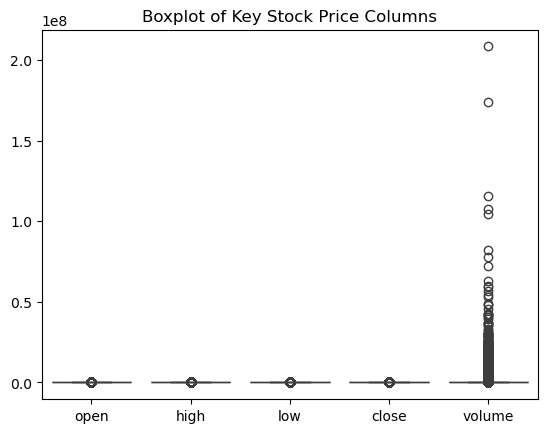

In [13]:
# Cgecking for outliers
sns.boxplot(data=df[['open', 'high', 'low', 'close', 'volume']])
plt.title("Boxplot of Key Stock Price Columns")
plt.show()

**Observation**

The volume column has a significant number of outliers represented by the individual points above the upper whisker of the box plot. This clearly illustrates there were many instances of high trading volume compared to the typical range. 

These are genuine outliers.

## 3. Data Preparation

### 3.1 Data Cleaning

In [14]:
# Removing the ticker column.
del df["ticker"]
df

symbol   open   high    low  close      volume   company_name  \
0      NSEKE:EGAD  41.75  41.75  41.25  41.25      5500.0    Eaagads Ltd   
1      NSEKE:EGAD  40.00  40.00  40.00  40.00      5300.0    Eaagads Ltd   
2      NSEKE:EGAD  39.50  39.50  39.00  39.50      4700.0    Eaagads Ltd   
3      NSEKE:EGAD  41.25  41.75  39.00  39.00     27600.0    Eaagads Ltd   
4      NSEKE:EGAD  41.25  41.25  39.00  39.00      1900.0    Eaagads Ltd   
...           ...    ...    ...    ...    ...         ...            ...   
71881  NSEKE:SCOM  27.85  28.50  27.00  27.90  18716618.0  Safaricom Ltd   
71882  NSEKE:SCOM  27.90  28.10  27.80  28.05   4260285.0  Safaricom Ltd   
71883  NSEKE:SCOM  28.50  28.50  27.95  28.25   8419327.0  Safaricom Ltd   
71884  NSEKE:SCOM  28.50  28.50  28.05  28.50  40614269.0  Safaricom Ltd   
71885  NSEKE:SCOM  28.25  29.00  28.20  28.80   1740579.0  Safaricom Ltd   

                industry             datetime  
0           Agricultural  2015-02-23 09:00:00  
1           Agricultural  2015-02-24 09:00:00  
2           Agricultural  2015-02-25 09:00:00  
3           Agricultural  2015-02-26 09:00:00  
4           Agricultural  2015-03-02 09:00:00  
...                  ...                  ...  
71881  Telecommunication  2025-10-21 09:00:00  
71882  Telecommunication  2025-10-22 09:00:00  
71883  Telecommunication  2025-10-23 09:00:00  
71884  Telecommunication  2025-10-24 09:00:00  
71885  Telecommunication  2025-10-27 09:00:00  

[71886 rows x 9 columns]

**Note:** The `ticker` column was removed as it was seen as redundant. The `symbol` and `company_name` columns were referring to the same thing.

In [15]:
# Replace "Investment Services" with "Investment" in the 'industry' column
df['industry'] = df['industry'].replace('Investment Services', 'Investment')

# Verify that it worked
print(df['industry'].value_counts())

industry
Commercial           14649
Banking              13890
Manufacturing        10429
Insurance             7517
Agricultural          6747
Investment            6500
Energy                5200
Construction          4835
Telecommunication     1300
Automobiles            819
Name: count, dtype: int64


**Note:** To ensure consistency in our analysis, we merged `Investment Services` and `Investment` into a single category. This avoids duplicate grouping and ensures all companies in the investment sector are analyzed together.

In [16]:
# Converting and formatting the datetime column
df['datetime'] = pd.to_datetime(df['datetime']).dt.strftime('%Y-%m-%d')
df["datetime"] = pd.to_datetime(df['datetime'])

In [17]:
# Setting the date as the index
df = df.set_index("datetime")
df

symbol   open   high    low  close      volume   company_name  \
datetime                                                                        
2015-02-23  NSEKE:EGAD  41.75  41.75  41.25  41.25      5500.0    Eaagads Ltd   
2015-02-24  NSEKE:EGAD  40.00  40.00  40.00  40.00      5300.0    Eaagads Ltd   
2015-02-25  NSEKE:EGAD  39.50  39.50  39.00  39.50      4700.0    Eaagads Ltd   
2015-02-26  NSEKE:EGAD  41.25  41.75  39.00  39.00     27600.0    Eaagads Ltd   
2015-03-02  NSEKE:EGAD  41.25  41.25  39.00  39.00      1900.0    Eaagads Ltd   
...                ...    ...    ...    ...    ...         ...            ...   
2025-10-21  NSEKE:SCOM  27.85  28.50  27.00  27.90  18716618.0  Safaricom Ltd   
2025-10-22  NSEKE:SCOM  27.90  28.10  27.80  28.05   4260285.0  Safaricom Ltd   
2025-10-23  NSEKE:SCOM  28.50  28.50  27.95  28.25   8419327.0  Safaricom Ltd   
2025-10-24  NSEKE:SCOM  28.50  28.50  28.05  28.50  40614269.0  Safaricom Ltd   
2025-10-27  NSEKE:SCOM  28.25  29.00  28.20  28.80   1740579.0  Safaricom Ltd   

                     industry  
datetime                       
2015-02-23       Agricultural  
2015-02-24       Agricultural  
2015-02-25       Agricultural  
2015-02-26       Agricultural  
2015-03-02       Agricultural  
...                       ...  
2025-10-21  Telecommunication  
2025-10-22  Telecommunication  
2025-10-23  Telecommunication  
2025-10-24  Telecommunication  
2025-10-27  Telecommunication  

[71886 rows x 8 columns]

In [18]:
# Saving data to CSV
df.to_csv("Data\clean_stocks", index=False)

### 3.2 Exploratory Data Analysis

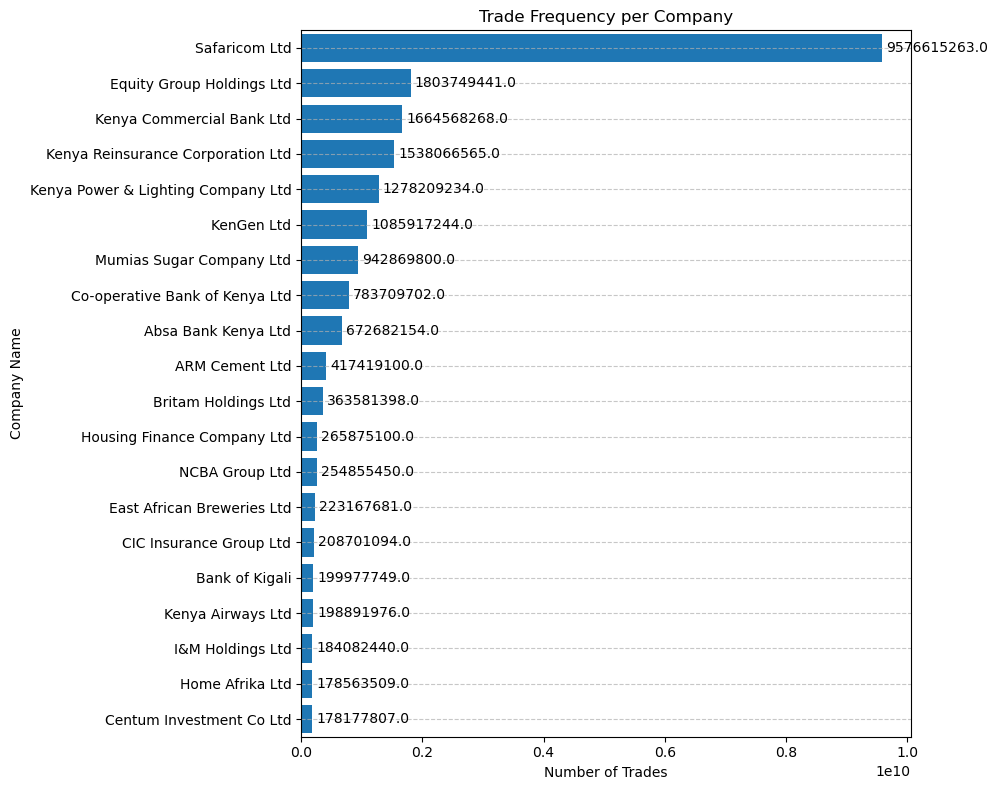

In [19]:
# Visualizing Volume per Company
# Number of trades for the top 20 companies
trade_counts = df.groupby("company_name")["volume"].sum().sort_values(ascending=True).tail(20)

plt.figure(figsize=(10, 8))
trade_counts.plot(kind='barh')

# Add labels to each bar
bars = plt.barh(trade_counts.index, trade_counts.values)
plt.bar_label(bars, labels=trade_counts.values, padding=3)

plt.title('Trade Frequency per Company')
plt.ylabel('Company Name')
plt.xlabel('Number of Trades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**
- Safaricom is the most traded company in Kenya amassing a volume of 9 billion shares traded in total.
- Safaricom beat Equity with a landslide of whihc had accumulated 1.8 billion shares traded. This is almost 5 times less than the volume of Safaricom.
- Safaricom, Equity, KCB, Kenya Reinsurance, KPLC and KenGen are the companies which have over 1 billion shares traded.

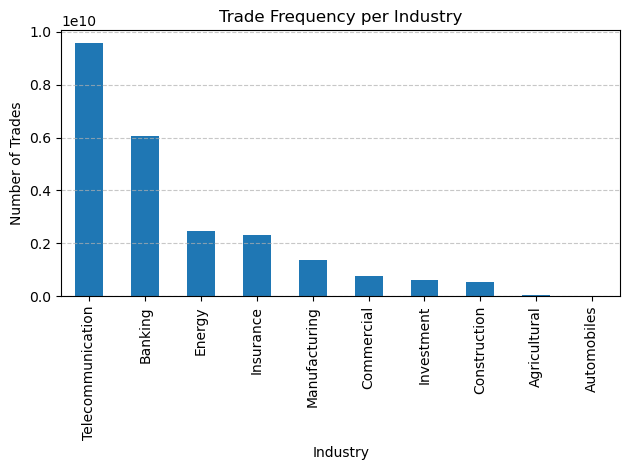

In [20]:
# Visualizing volume per industry
trade_counts = df.groupby("industry")["volume"].sum().sort_values(ascending=False)

trade_counts.plot(kind='bar')
plt.title('Trade Frequency per Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Trades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**
- The Telecommunication sector leads in volume by around 9 billion.
- Banking comes at distant second with a volume of around 6 billion.
- Investment Services, Agricultural and Automobiles are the bottom three sectors in our dataset with each having less than 100 million total trades.

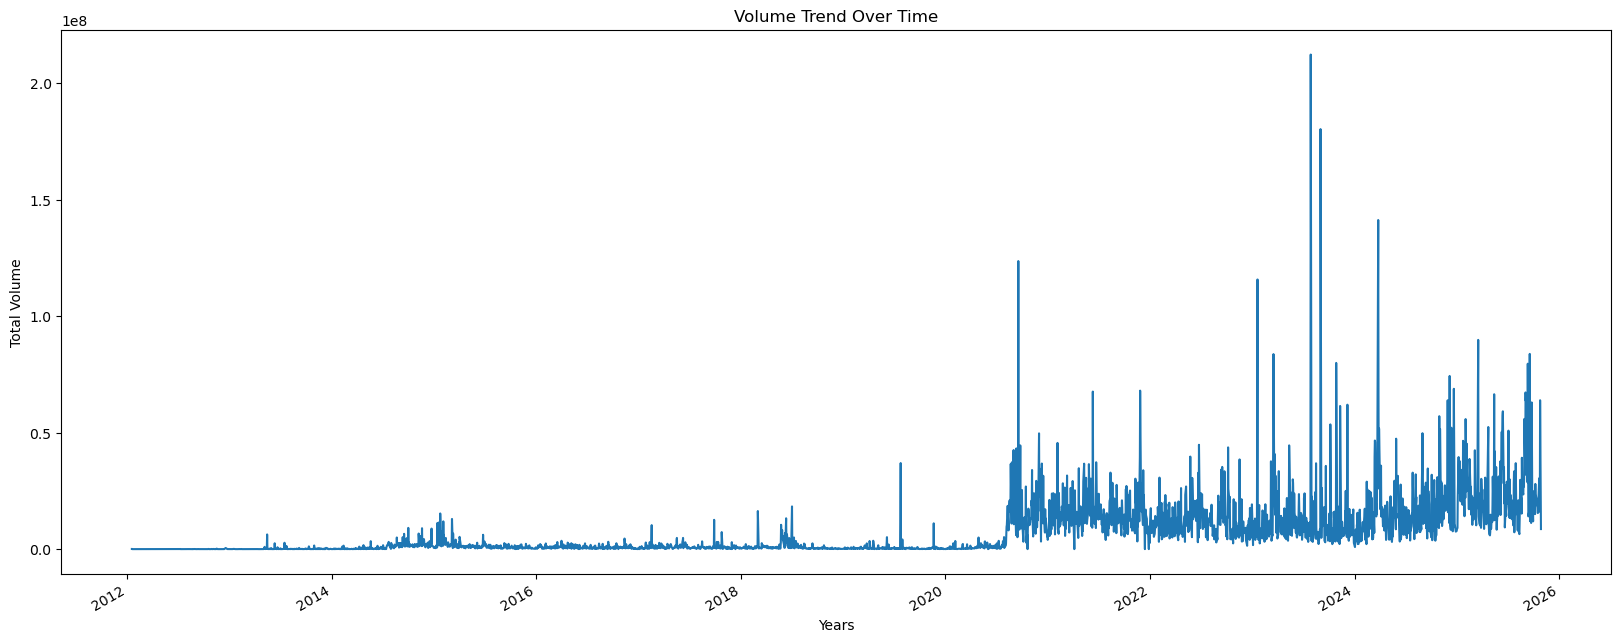

In [21]:
# Volume Trend over Time
plt.figure(figsize=(20, 8))
df.groupby(df.index)['volume'].sum().plot(kind='line')

plt.title('Volume Trend Over Time')
plt.ylabel('Total Volume')
plt.xlabel('Years');

**Observations**
- There wasn't much trading activity activity between 2012 and mid-2020 as seen with the low volume during this time.
- There was a huge spike in trading activity after 2020. Presumably because after a lot of layoffs during the COVID-19 pandemic, many switched to trading as a source of income.
- The highest trading volume was recorded in 2023 where it reached as high as 2 billion.

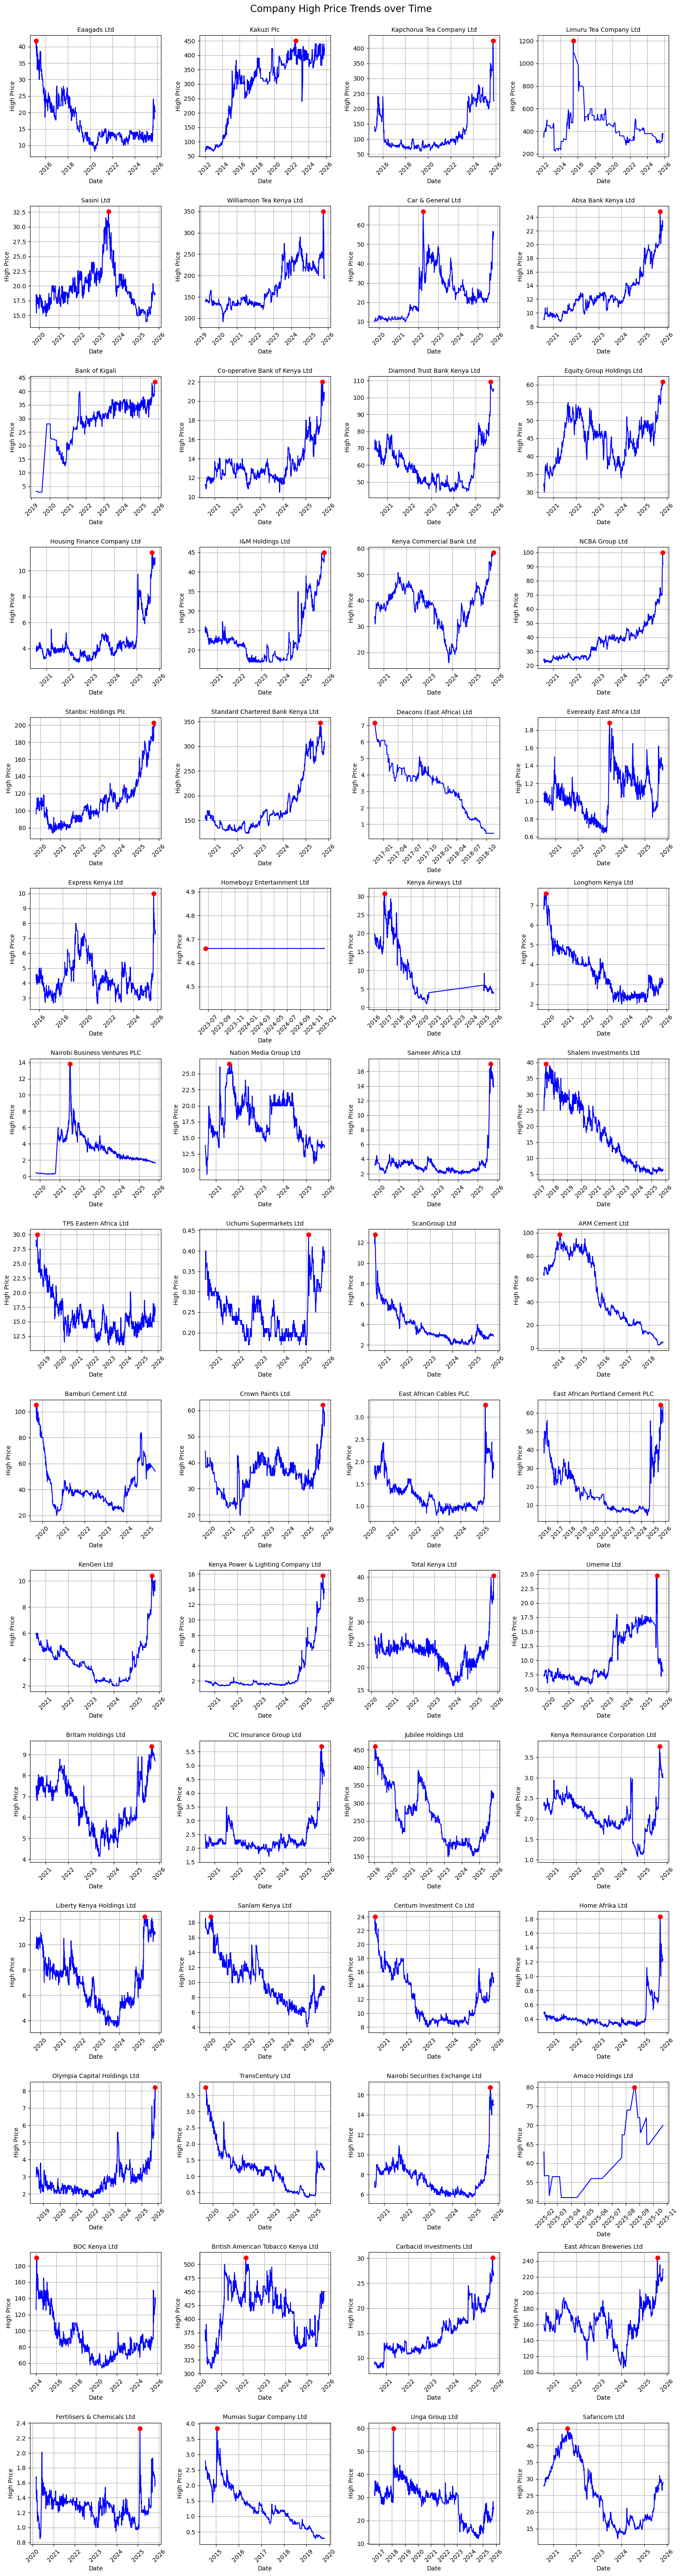

In [22]:
# Visualizing Company High Price Trends over Time
# Getting all unique companies
companies = df['company_name'].unique()
n_companies = len(companies)

cols = 4  
rows = -(-n_companies // cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, company in enumerate(companies):
    company_data = df[df['company_name'] == company].sort_index()
    
    ax = axes[i]
    ax.plot(company_data.index, company_data['high'], color='blue')
    
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('High Price')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

    # Highlight highest point
    max_row = company_data.loc[company_data['high'].idxmax()]
    ax.scatter(max_row.name, max_row['high'], color='red', s=50, zorder=5)

fig.suptitle('Company High Price Trends over Time', fontsize=16, y = 1)
plt.tight_layout()
plt.show()

**Observations**
- Most stocks show distinct periods of growth and decline, suggesting cyclical market patterns.
- These companies show a wide variety of behaviours. However, most of them show an upward trend especially post-COVID when the economy was slowly getting better.
- Some of these companies like `Deacons` and `ARM Cement`, `Mumias` are no longer publicly traded as they seem to have no activity after 2018 and 2019 for `Mumias Sugar`.
- `HomeBoyz Entertainment Ltd` seems to be stationary as it has no upward or downward trend. This signifies low liquidity or inactive trading.
- `Amaco Holdings Ltd` seems to be the latest entrant into the Nairobi Stock Exchange as it's data only run from February 2025.
- All of the companies in the Banking industry like `Co-operative Bank of Kenya`, `Equity`, `I&M`, `HFC`, `Kenya Commercial Bank` have recorded their highest point in 2025.
- Peak highs occur at different times across firms; proving that not all companies peaked in the same market phase.

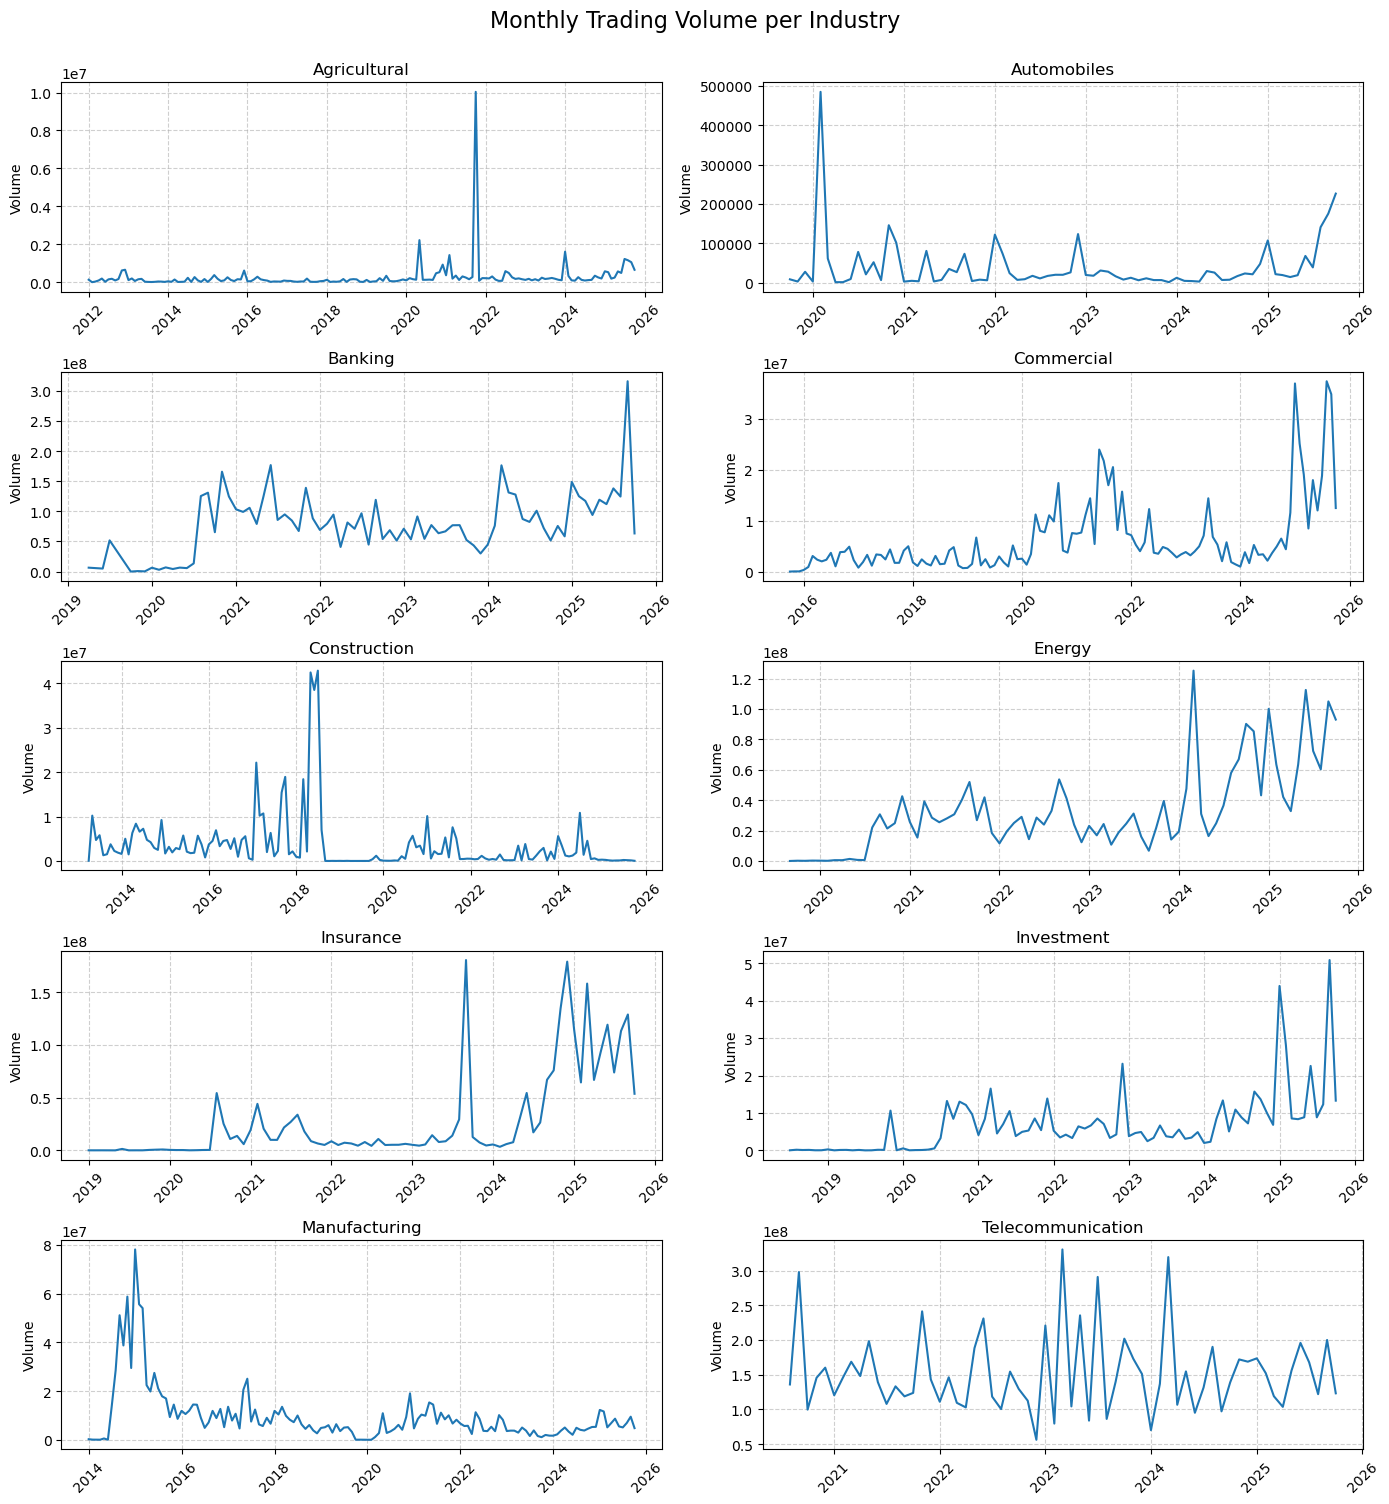

In [23]:
# Visualizing Monthly Trading Volume per Industry
# Grouping in year-month
df['month'] = df.index.to_period('M')

monthly_volume = (
    df.groupby(['industry', 'month'])['volume']
      .sum()
      .reset_index()
)

# Convert to datetime format
monthly_volume['month'] = monthly_volume['month'].dt.to_timestamp()

industries = monthly_volume['industry'].unique()

n = len(industries)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

for i, industry in enumerate(industries):
    ind_data = monthly_volume[monthly_volume['industry'] == industry]
    axes[i].plot(ind_data['month'], ind_data['volume'])
    axes[i].set_title(industry)
    axes[i].set_ylabel('Volume')
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].tick_params(axis='x', rotation=45)

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Monthly Trading Volume per Industry', fontsize=16, y= 1)
plt.tight_layout()
plt.show()

**Observations**
- The Telecomunication industry seems to be the most volatile in our dataset.
- The insurance, investment, investment services, energy, commercial, banking became very actively traded industries between 2024 and 2025.
- The construction sector was more active before 2019 than after. It had reached almost 40 million trades in late 2018 and after that, the highest it ever reached was 10 million trades.
- The Manufacturing sector has been on a general downward trend reaching a volume of 10 million trades.

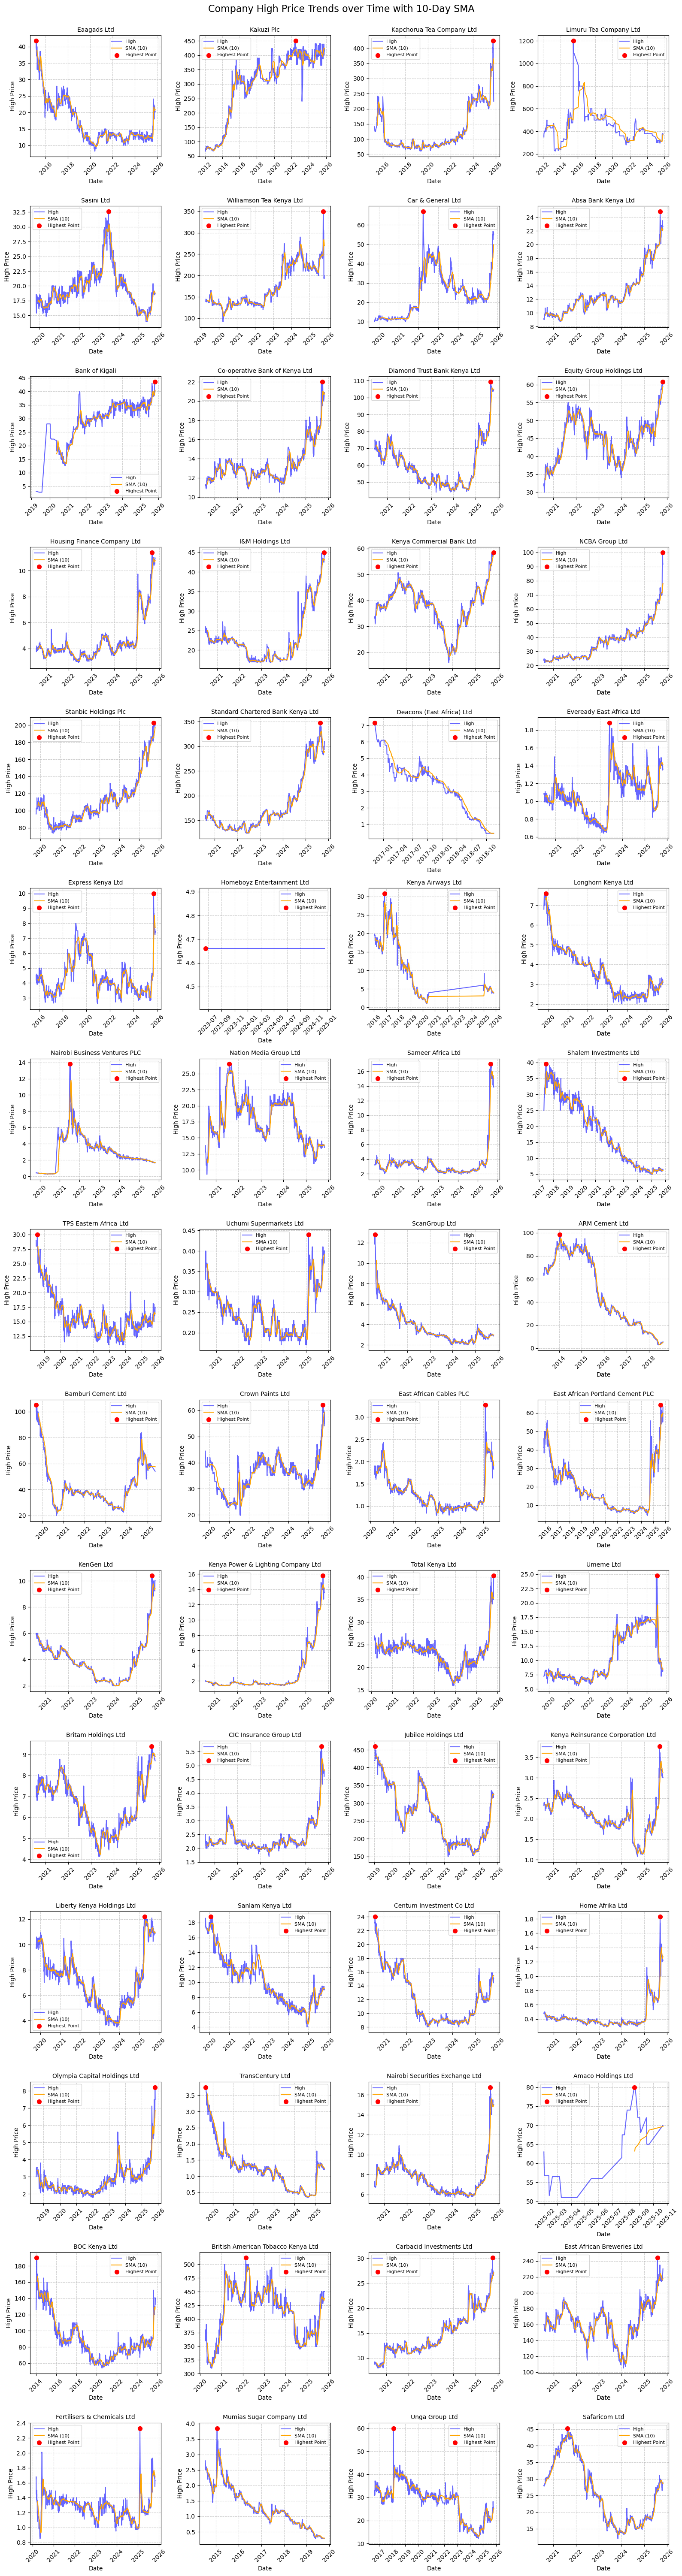

In [24]:
# Visualizing Company High Price Trends with 10-day SMA per Company
cols = 4  
rows = -(-n_companies // cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, company in enumerate(companies):
    company_data = df[df['company_name'] == company].sort_index().copy()
    
    # Calculating 10-day SMA
    company_data['SMA_10'] = company_data['high'].rolling(window=20).mean()
    
    ax = axes[i]
    
    # Plotting high prices
    ax.plot(company_data.index, company_data['high'], color='blue', label='High', alpha = 0.6)
    
    # Plotting SMA
    ax.plot(company_data.index, company_data['SMA_10'], color='orange', label='SMA (10)')
    
    ax.set_title(company, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('High Price')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

    max_row = company_data.loc[company_data['high'].idxmax()]
    ax.scatter(max_row.name, max_row['high'], color='red', s=50, zorder=5, label='Highest Point')
    
    ax.legend(fontsize=8)

fig.suptitle('Company High Price Trends over Time with 10-Day SMA', fontsize=16, y = 1)
plt.tight_layout()
plt.show()

**Observations**
- The Simple Moving Average (SMA) smoothened out the short-term fluctuations making it easier to see the long-term trends for each company.

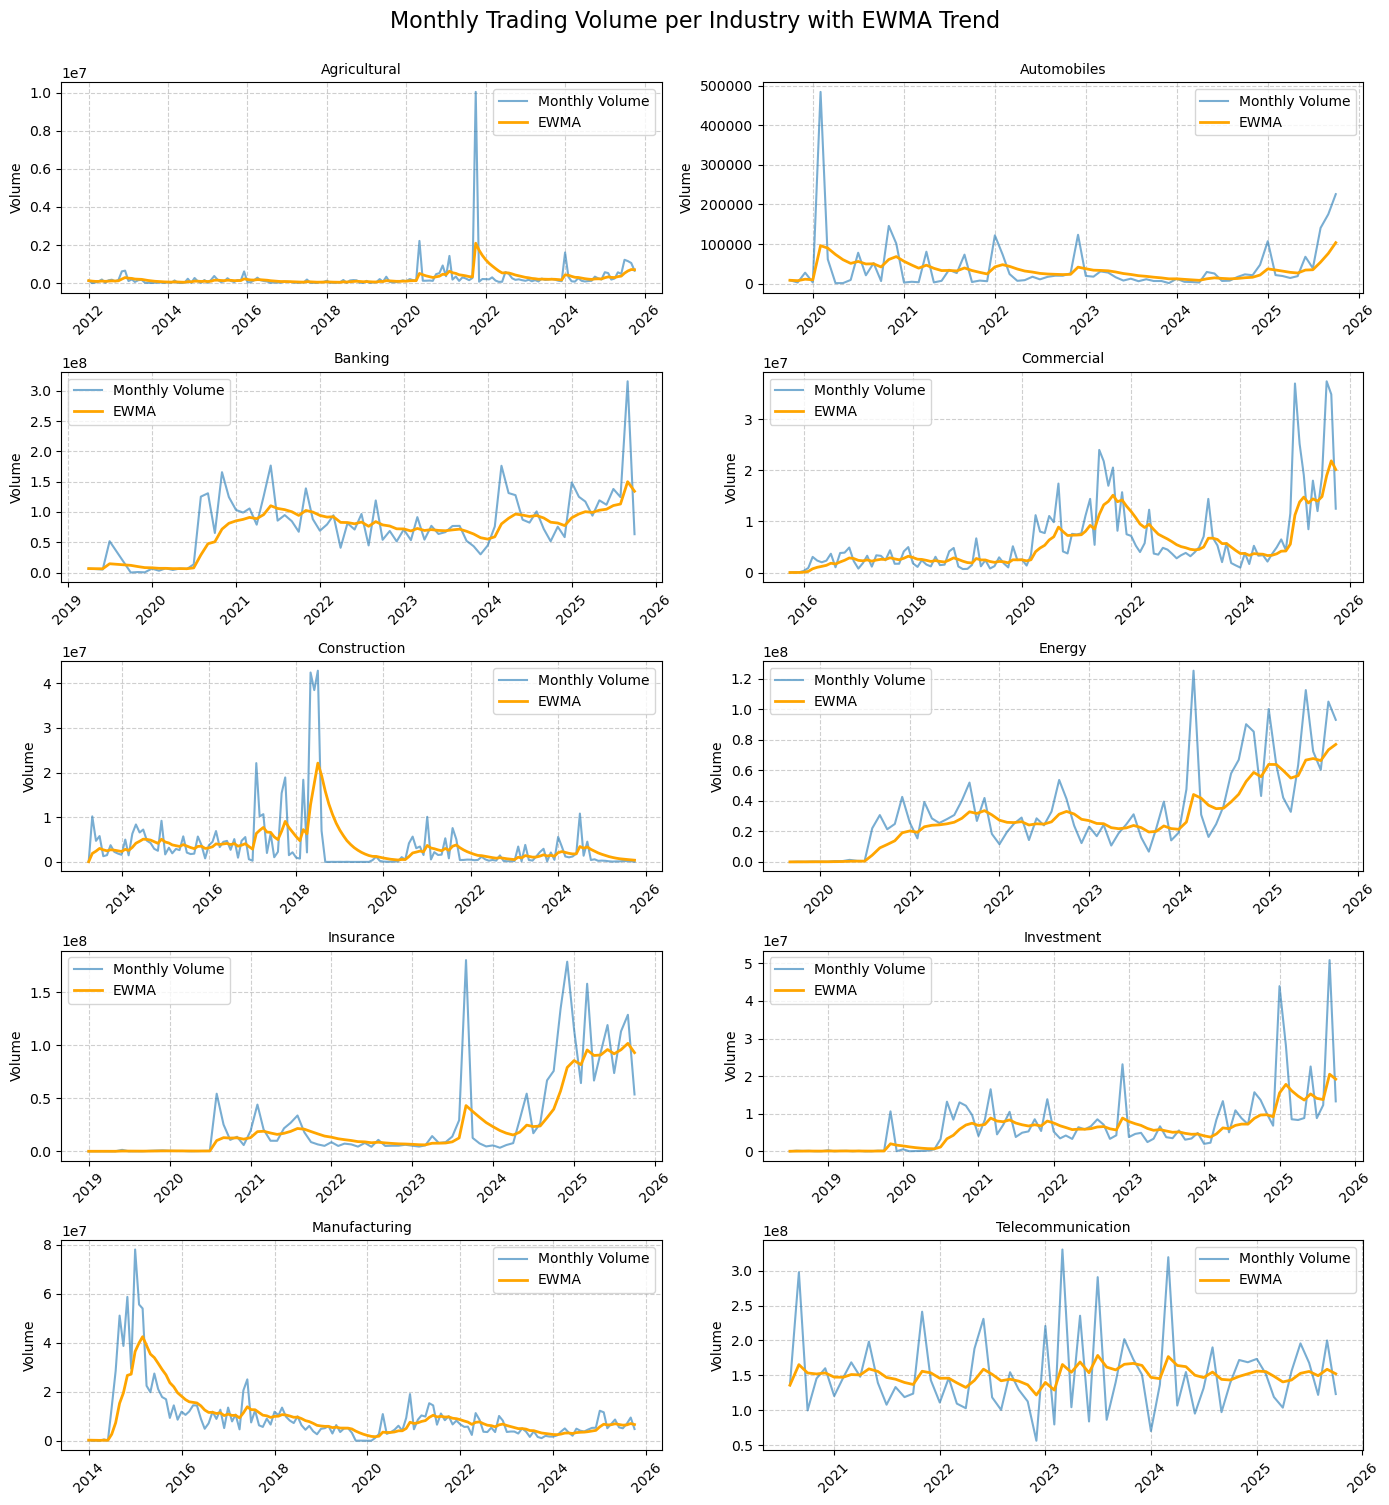

In [25]:
# Visualizing EWMA per Industry
n = len(industries)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

# Plotting each industry’s trend
for i, industry in enumerate(industries):
    ind_data = monthly_volume[monthly_volume['industry'] == industry].sort_values('month')
    
    # Computing EWMA (Exponential Weighted Moving Average)
    ind_data['ewma'] = ind_data['volume'].ewm(span=10, adjust=False).mean()
    
    ax = axes[i]
    ax.plot(ind_data['month'], ind_data['volume'], label='Monthly Volume', alpha=0.6)
    ax.plot(ind_data['month'], ind_data['ewma'], label='EWMA', color='orange', linewidth=2)
    
    ax.set_title(industry, fontsize=10)
    ax.set_ylabel('Volume')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Monthly Trading Volume per Industry with EWMA Trend', fontsize=16, y = 1)
plt.tight_layout()
plt.show()

**Observations**
- With EWMA, we can see a clearer, smoother trend:
    - Telecommunication seems to be stable all through. The COVID-19 pandemic did not have much of an effect on it.
    - The Agricultural sector seems also to not have been affected as its volume has generally always been low.
    - Commercial, energy, banking and insurance sectors seem to be on an upward trend from 2024.
    - The manufacturing sector had a slight volume increase in 2015 then dropped later on. Seems like it has not been able to recover since then.

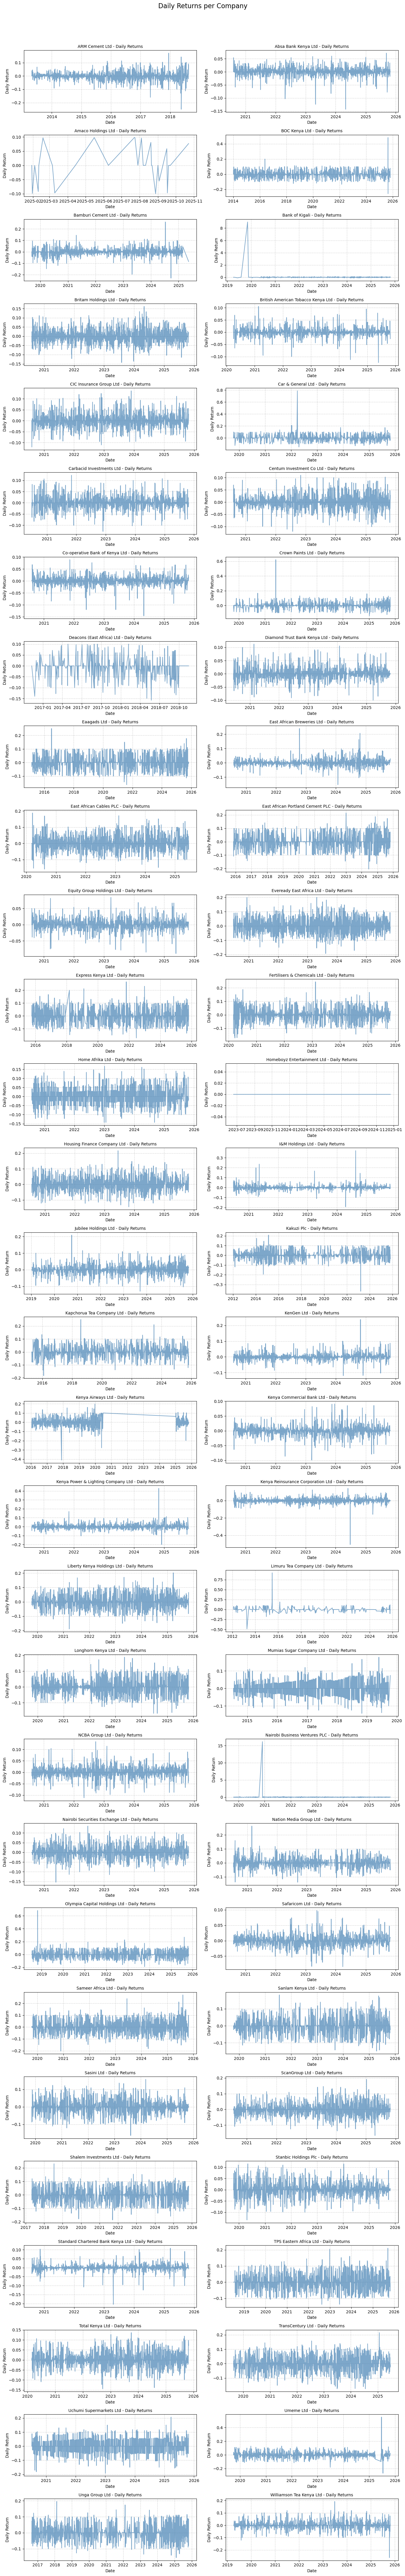

In [26]:
# Ensure datetime is a column
df = df.reset_index()

# Sort and calculate daily returns
df = df.sort_values(by=['company_name', 'datetime'])
df['daily_return'] = df.groupby('company_name')['close'].pct_change()
df['daily_return'] = df['daily_return'].fillna(0)

# Get list of companies
companies = df['company_name'].unique()

# Set up subplots
n = len(companies)
cols = 2
rows = (n + 1) // cols  
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

# Plot each company's daily returns
for i, company in enumerate(companies):
    subset = df[df['company_name'] == company]
    axes[i].plot(subset['datetime'], subset['daily_return'], color='steelblue', alpha=0.7)
    axes[i].set_title(f'{company} - Daily Returns', fontsize=10)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Return')
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove empty plots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Daily Returns per Company', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Daily Returns Analysis by Company

Daily returns measure the percentage change in closing prices from one day to the next, helping to capture short-term price movements and market reactions.

#### Key Insights
- Most companies exhibit relatively stable and low daily return fluctuations, reflecting steady stock behavior and consistent investor sentiment.
- A few companies show extreme spikes, suggesting sudden price shocks, speculative trading, or thin market liquidity.
- Companies with consistently flat return lines likely have low trading activity or infrequent price changes.

The following companies show unusual or extreme daily return movements and warrant further investigation:
- **ARM Cement Ltd** – frequent sharp spikes in returns; could indicate speculative activity or irregular price reporting.  
- **TransCentury Ltd** – large and inconsistent daily swings, suggesting potential financial distress or low liquidity.  
- **Kenya Airways Ltd** – pronounced fluctuations possibly tied to news, debt issues, or external economic shocks.  
- **Eveready East Africa Ltd** – sudden upward and downward jumps hint at instability or infrequent trading.  
- **National Bank of Kenya Ltd** – noticeable erratic return movements compared to the broader market trend.  


### Takeaway

From the company-level daily returns, it's clear that some firms experience sharp fluctuations while others remain relatively stable, reflecting differences in liquidity, investor sentiment, and exposure to market forces.  

While this analysis focused on individual companies, at a broader level, industries tend to show similar patterns, for example, **Banking and Telecommunication** sectors generally appear more stable, whereas **Energy, Agriculture, and Automobile** sectors often display higher volatility.  
  
Stable companies and industries are typically **low-risk, steady performers**, while those with higher fluctuations can offer **higher potential returns but greater short-term risk**. This insight helps guide investment strategy, balancing growth opportunities with risk management.

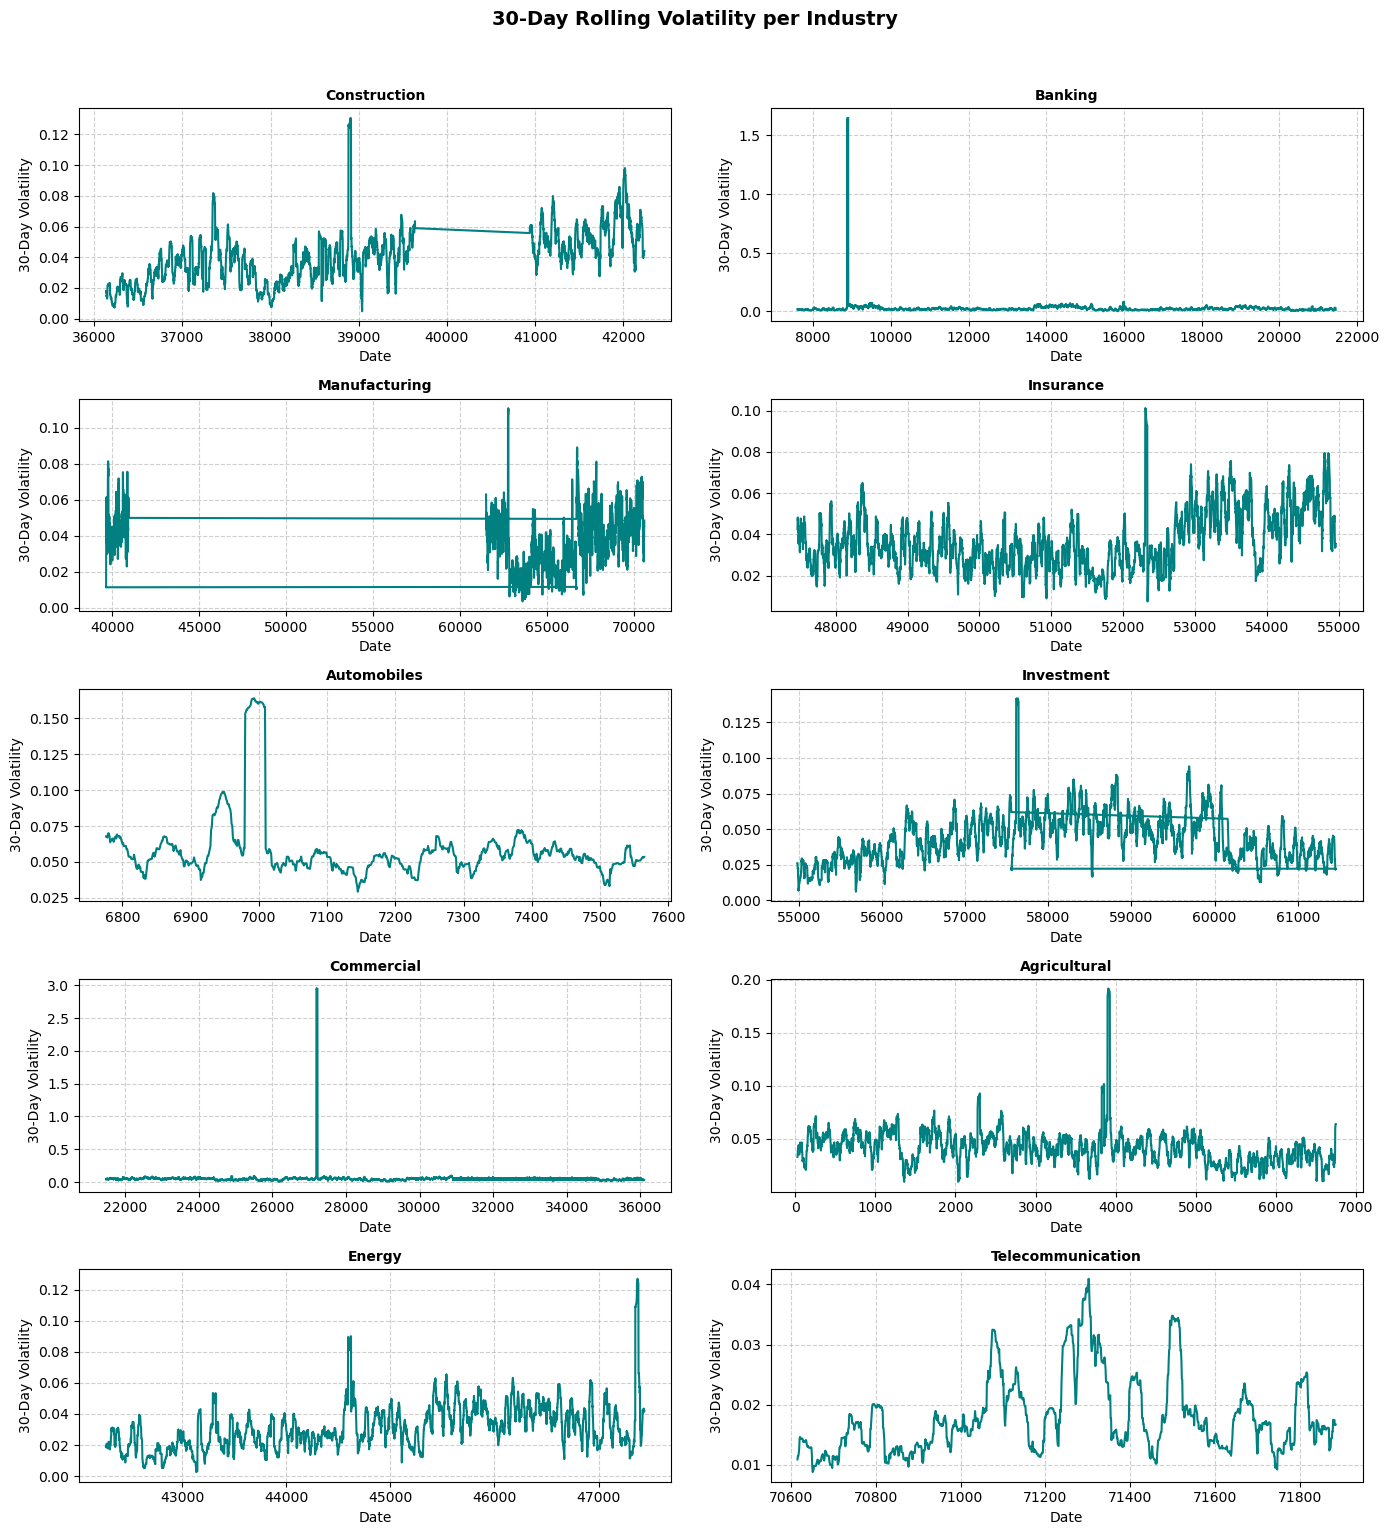

In [27]:
# Compute 30-day rolling volatility per industry
df['volatility_30d'] = (
    df.groupby('industry')['daily_return']
      .rolling(window=30)
      .std()
      .reset_index(level=0, drop=True)
)

# Get unique industries 
industries = df['industry'].dropna().unique()

# Create subplots
n = len(industries)
cols = 2  
rows = (n + 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

# Plot each industry's volatility
for i, industry in enumerate(industries):
    subset = df[df['industry'] == industry]
    axes[i].plot(subset.index, subset['volatility_30d'], color='teal')
    axes[i].set_title(industry, fontsize=10, fontweight='bold')
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("30-Day Volatility")
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("30-Day Rolling Volatility per Industry", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Volatility Analysis by Sector

Volatility, calculated here as the 30-day rolling standard deviation of daily returns, measures the degree of price fluctuation over time and serves as a key indicator of market risk and uncertainty.

### Key Insights

- **Systemic Risk:**  All sectors experienced a massive and simultaneous spike in volatility around 2020, reflecting a market-wide shock, most likely the COVID-19 pandemic. This event impacted nearly all industries at once.


- **Stable Sectors:**  Telecommunication and Insurance consistently display the lowest baseline volatility, suggesting they are more stable, predictable, and less reactive to daily market fluctuations.


- **Volatile Sectors:**  Energy, Agriculture, and Manufacturing sectors show higher and more erratic volatility, indicating greater exposure to market and economic shifts.


- **Shock Reaction:**  During the 2020 spike, Energy and Banking sectors had the most extreme volatility surges, while Telecommunication experienced a milder response, reinforcing its reputation as a defensive sector.

### Takeaway

From the sector-level volatility plots, it's evident that while all sectors respond to global market shocks, their underlying risk profiles differ substantially.  

- **Stable sectors** can form the defensive core of an investment portfolio, offering steady performance and lower risk.  
- **Volatile sectors** present higher return potential but come with greater uncertainty and sensitivity to market swings.

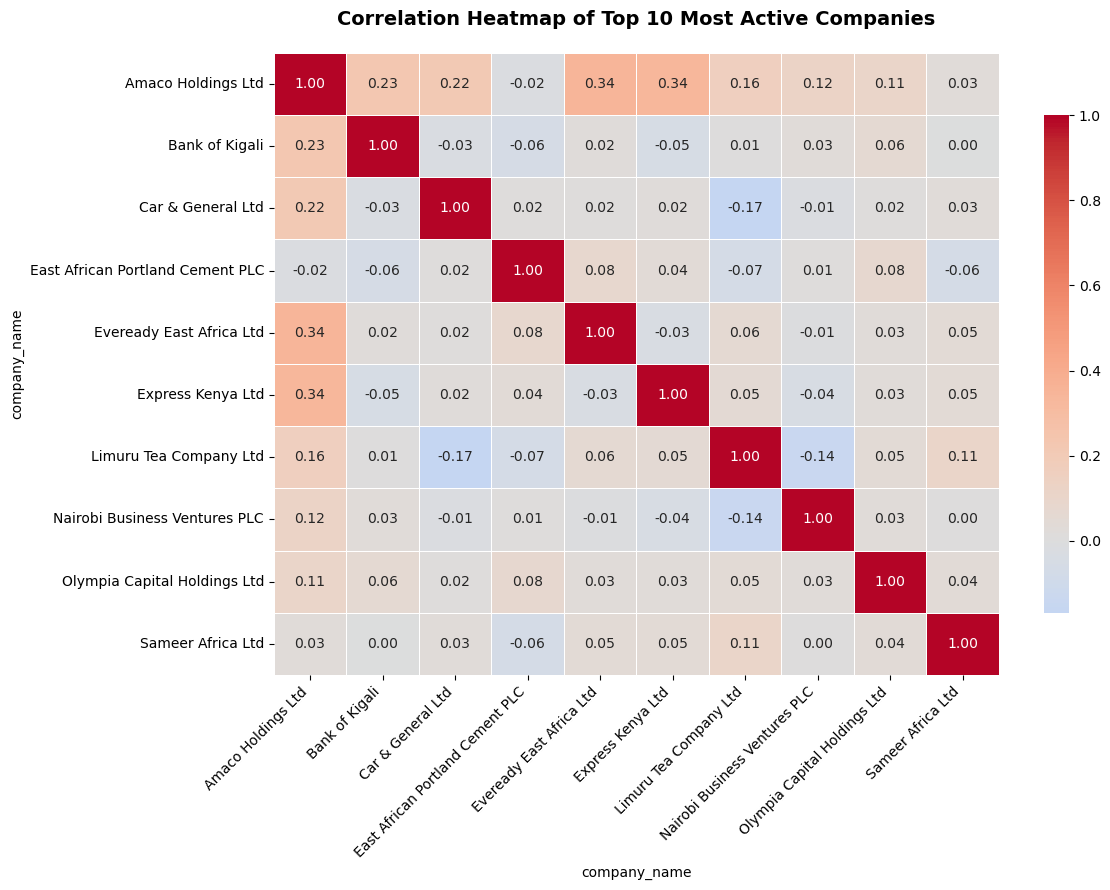

In [28]:
# Clean and prepare the data
df = df.reset_index() if 'datetime' not in df.columns else df.copy()
df = df.loc[:, ~df.columns.duplicated()].copy()

# Drop missing daily returns
df = df.dropna(subset=['daily_return'])

# Get top 10 most active companies based on return variability
top_companies = (
    df.groupby('company_name')['daily_return']
    .std()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Pivot only these companies
returns_pivot = df[df['company_name'].isin(top_companies)] \
    .pivot(index='datetime', columns='company_name', values='daily_return')

# Compute correlation matrix
correlation_matrix = returns_pivot.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap of Top 10 Most Active Companies", fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Correlation Heatmap Analysis for the top 10 Most Active Companies
### Key Insights

1. **Self-Correlation:**  
   Each company shows a perfect correlation, **1.00**, with itself along the diagonal as expected.
   

2. **Notable Positive Relationships:**  
   - Amaco Holdings Ltd and Eveready East Africa Ltd: **0.34**  
   - Amaco Holdings Ltd and Express Kenya Ltd: **0.34**  
   These represent the strongest positive links, suggesting these companies' stock movements are influenced by similar market factors.
   

3. **Weak Correlations:**  
   Most company pairs show very low correlation values of around **0.00**, indicating that their price movements are largely independent.  
   Examples include:  
   - Bank of Kigali and Sameer Africa Ltd: **0.00**  
   - Nairobi Business Ventures PLC and Sameer Africa Ltd: **0.00**
   

4. **Negative Correlations:**  
   - Limuru Tea Company Ltd and Car & General Ltd: **-0.17**  
   - Limuru Tea Company Ltd and Nairobi Business Ventures PLC: **-0.14**  
   These inverse relationships suggest that when one stock rises, the other tends to decline.
   

5. **Overall Market Pattern:**  
   Correlations generally range between **-0.10 and 0.10**, showing that most of these top companies operate independently.  
   This independence indicates strong diversification opportunities, since one company's performance has little impact on another.

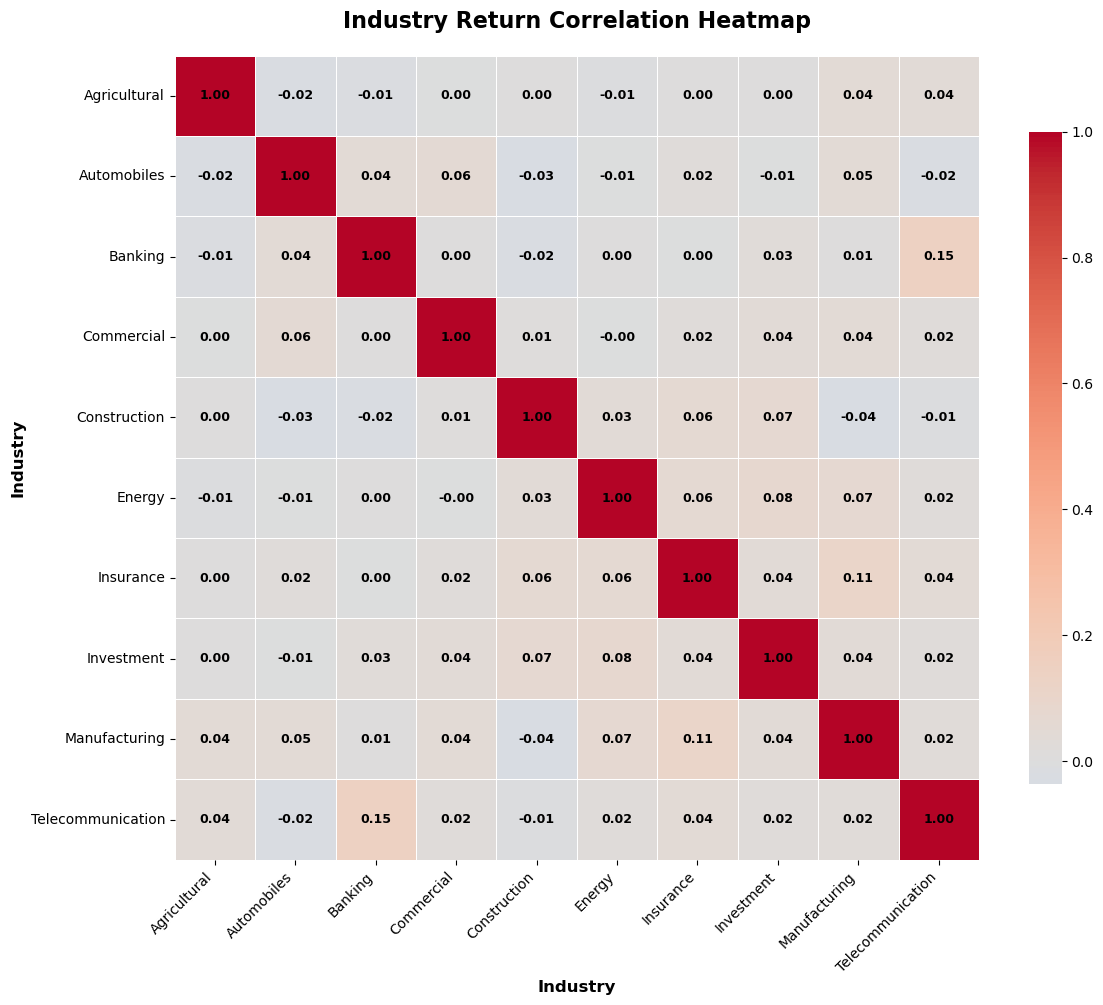

In [29]:
# Compute the average daily return per industry per date
industry_returns = (
    df.groupby(['datetime', 'industry'])['daily_return']
      .mean()
      .unstack() 
)

# Compute the correlation matrix 
correlation_matrix = industry_returns.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 10))

heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,        
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    ax=ax
)

# Add correlation numbers manually 
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color="black", fontsize=9, weight='bold')

plt.title('Industry Return Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Industry', fontsize=12, fontweight='bold')
plt.ylabel('Industry', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Industry Return Correlation Heatmap Analysis
### Key Insights

1. **Self-Correlation:**  
   Every industry shows a perfect correlation, **1.00**, with itself along the diagonal as expected.
   

2. **Notable Positive Relationships:**  
   - Banking and Telecommunication: **0.15**  
   - Insurance and Manufacturing: **0.11**  
   These are the strongest observed positive correlations, though they remain relatively weak overall.
   

3. **Very Weak Correlations:**  
   Most sector pairs exhibit correlations between **-0.10 and 0.10**, suggesting independent movement across industries.  
   Examples include:  
   - Agricultural and Commercial: **0.00**  
   - Agricultural and Construction: **0.00**  
   - Banking and Energy: **0.00**  
   - Banking and Insurance: **0.00**
   

4. **Slight Negative Correlations:**  
   Only a few negative relationships appear, and all are extremely weak:  
   - Automobiles and Construction: **-0.03**  
   - Automobiles and Commercial: **-0.03**  
   - Manufacturing and Construction: **-0.04**
   

5. **Overall Market Pattern:**  
   The heatmap shows minimal co-movement between industries, meaning sector returns are largely independent.  
   This independence suggests that different industries are driven by sector-specific factors rather than common market shocks.


### Takeaway

- The near-zero correlations across industries indicate strong diversification potential.  
- Investors can reduce overall portfolio risk by combining assets from sectors that move independently, for example, pairing financial sectors like Banking and Insurance with unrelated ones such as Agriculture or Energy.  
- This independence makes cross-industry diversification a particularly effective strategy for risk management and portfolio stability.
